<span style="font-size:32px; font-weight:bold;">Linear Regression Model</span>

<span style="font-size:29px; font-weight:bold;">*Wine Quality Dataset*</span>


<span style="font-size:20px; font-weight:bold;">Step 0: Import Libraries and Load Data</span>


In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_wine


In [2]:
#load data
data = load_wine()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target #the type of wine



<span style="font-size:20px; font-weight:bold;"> Step 1: Data Exploratory Analysis</span>


In [3]:
data_head = df.head()
print(data_head)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


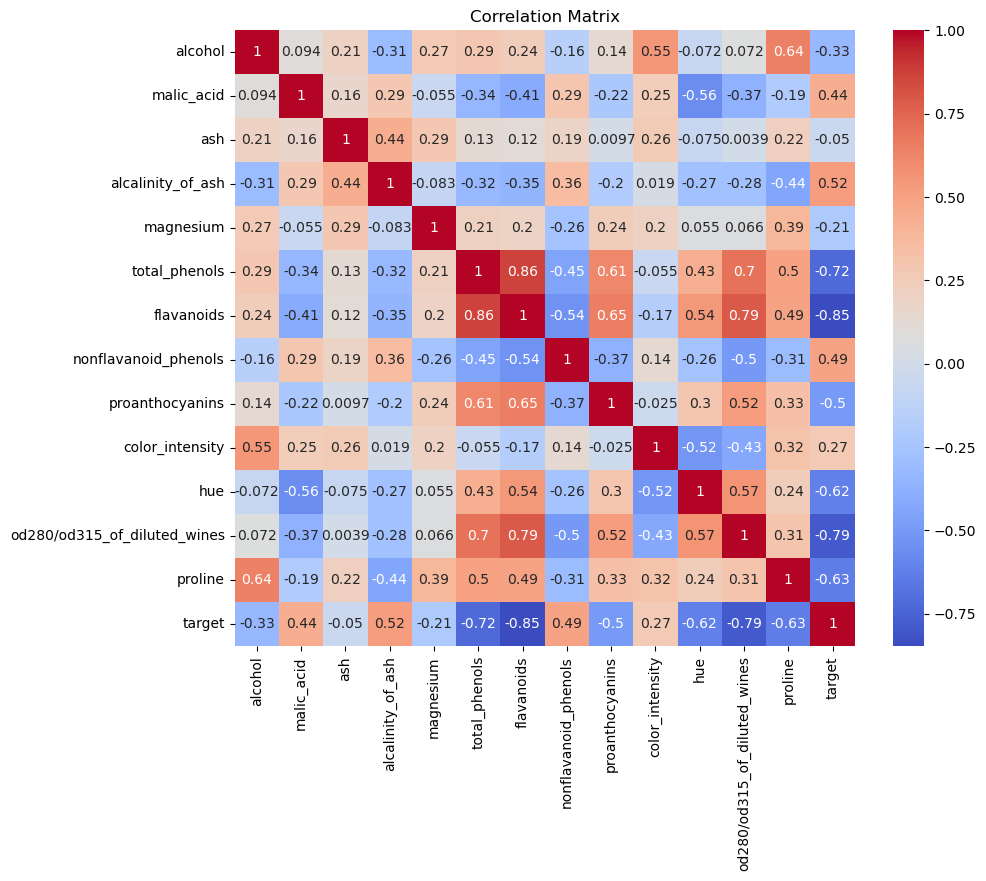

In [5]:
#explore correlation 
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title("Correlation Matrix")
plt.show()

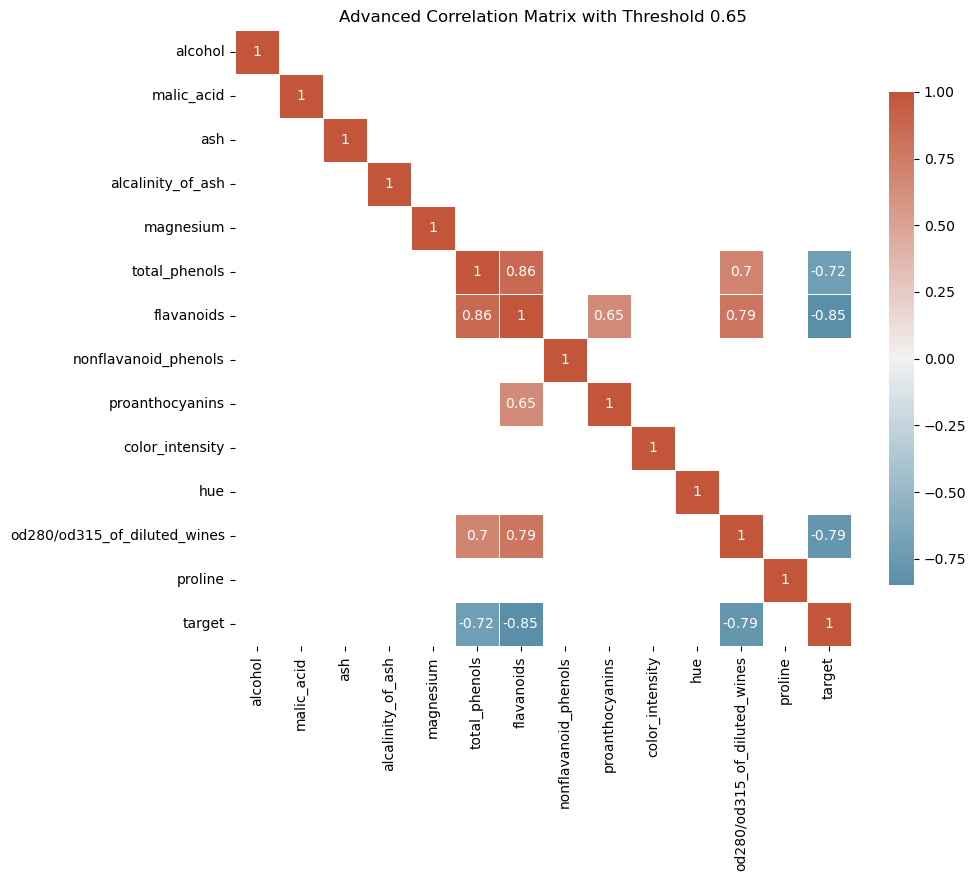

In [6]:
corr = df.corr()

# mask to display only correlations above a certain threshold
threshold = 0.65
mask = np.abs(corr) < threshold

# Set up the figure
plt.figure(figsize=(10, 8))

# diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=True)

# Add a title
plt.title('Advanced Correlation Matrix with Threshold 0.65')
plt.show()

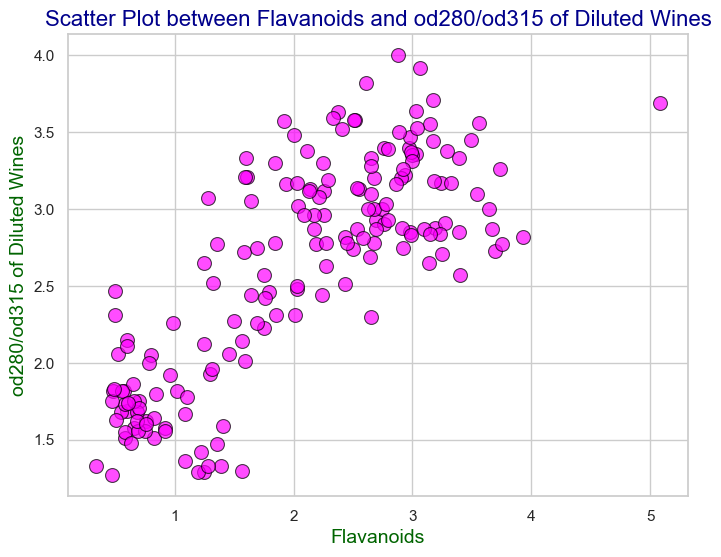

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flavanoids', y='od280/od315_of_diluted_wines', data=df, color='magenta', s=100, edgecolor='black', alpha=0.7)
plt.title('Scatter Plot between Flavanoids and od280/od315 of Diluted Wines', fontsize=16, color='darkblue')
plt.xlabel('Flavanoids', fontsize=14, color='darkgreen')
plt.ylabel('od280/od315 of Diluted Wines', fontsize=14, color='darkgreen')
plt.show()

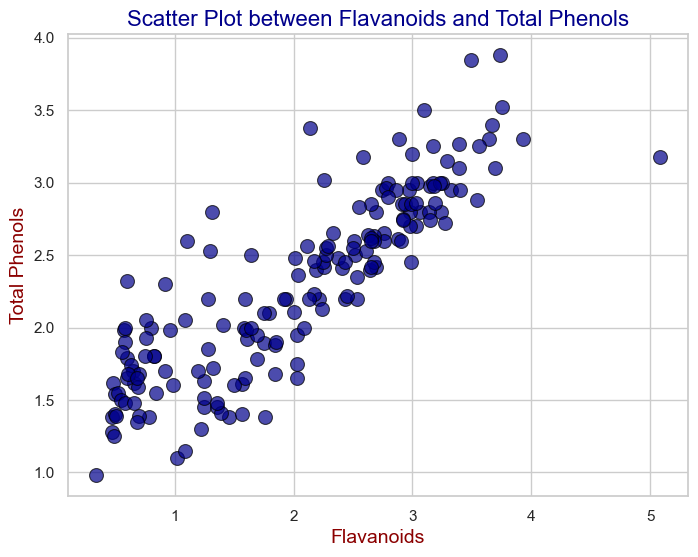

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flavanoids', y='total_phenols', data=df, color='darkblue', s=100, edgecolor='black', alpha=0.7)
plt.title('Scatter Plot between Flavanoids and Total Phenols', fontsize=16, color='darkblue')
plt.xlabel('Flavanoids', fontsize=14, color='darkred')
plt.ylabel('Total Phenols', fontsize=14, color='darkred')
plt.show()

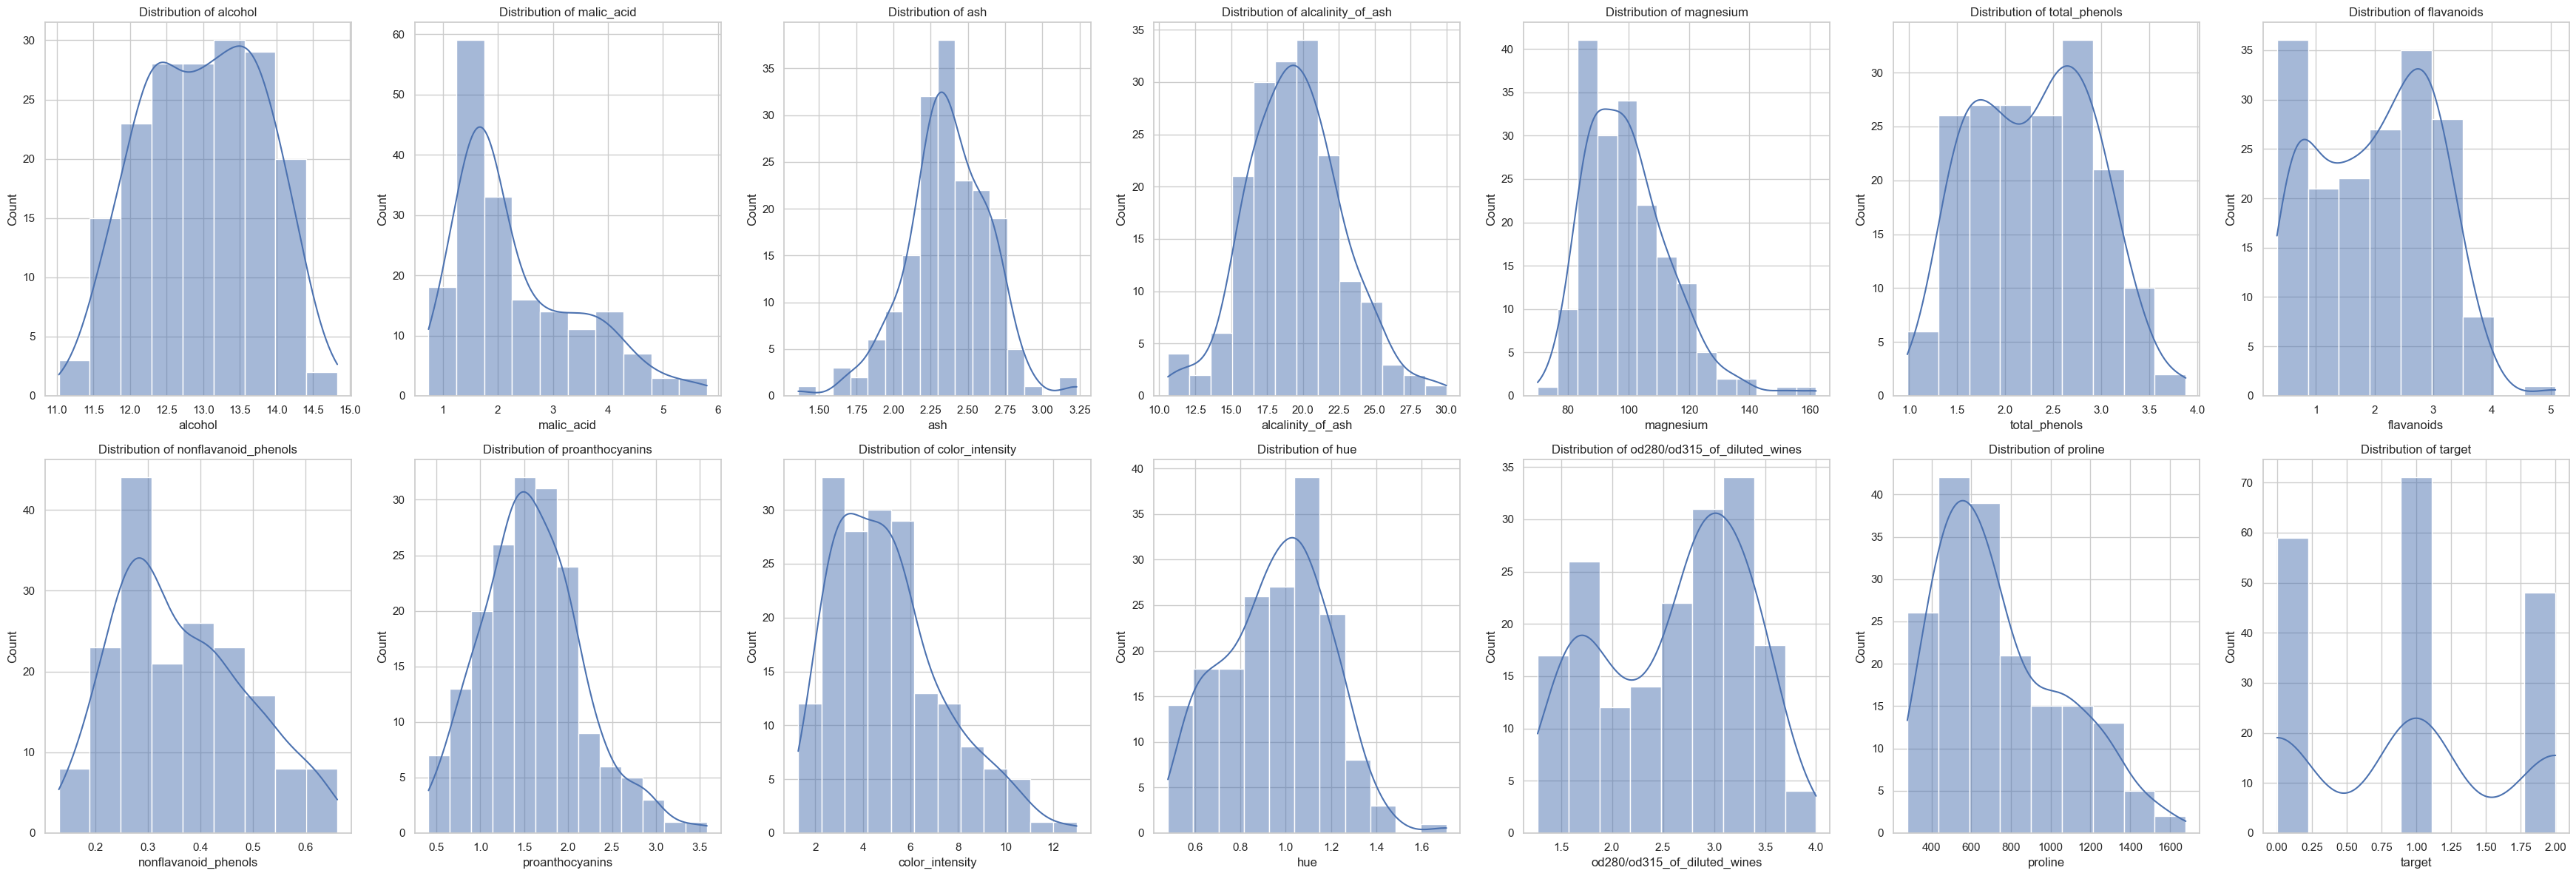

In [9]:
#distribution plots
num_cols = df.columns  # or df.select_dtypes(include=['float64', 'int64']).columns for only numeric columns
num_plots = len(num_cols)
num_cols_per_row = (num_plots + 1) // 2  # Calculates the number of columns per row

# Set up the matplotlib figure with dynamic sizing
plt.figure(figsize=(num_cols_per_row * 5, 12))  # Adjust size to accommodate two rows

for i, column in enumerate(num_cols):
    plt.subplot(2, num_cols_per_row, i + 1)  # Create subplots in 2 rows
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


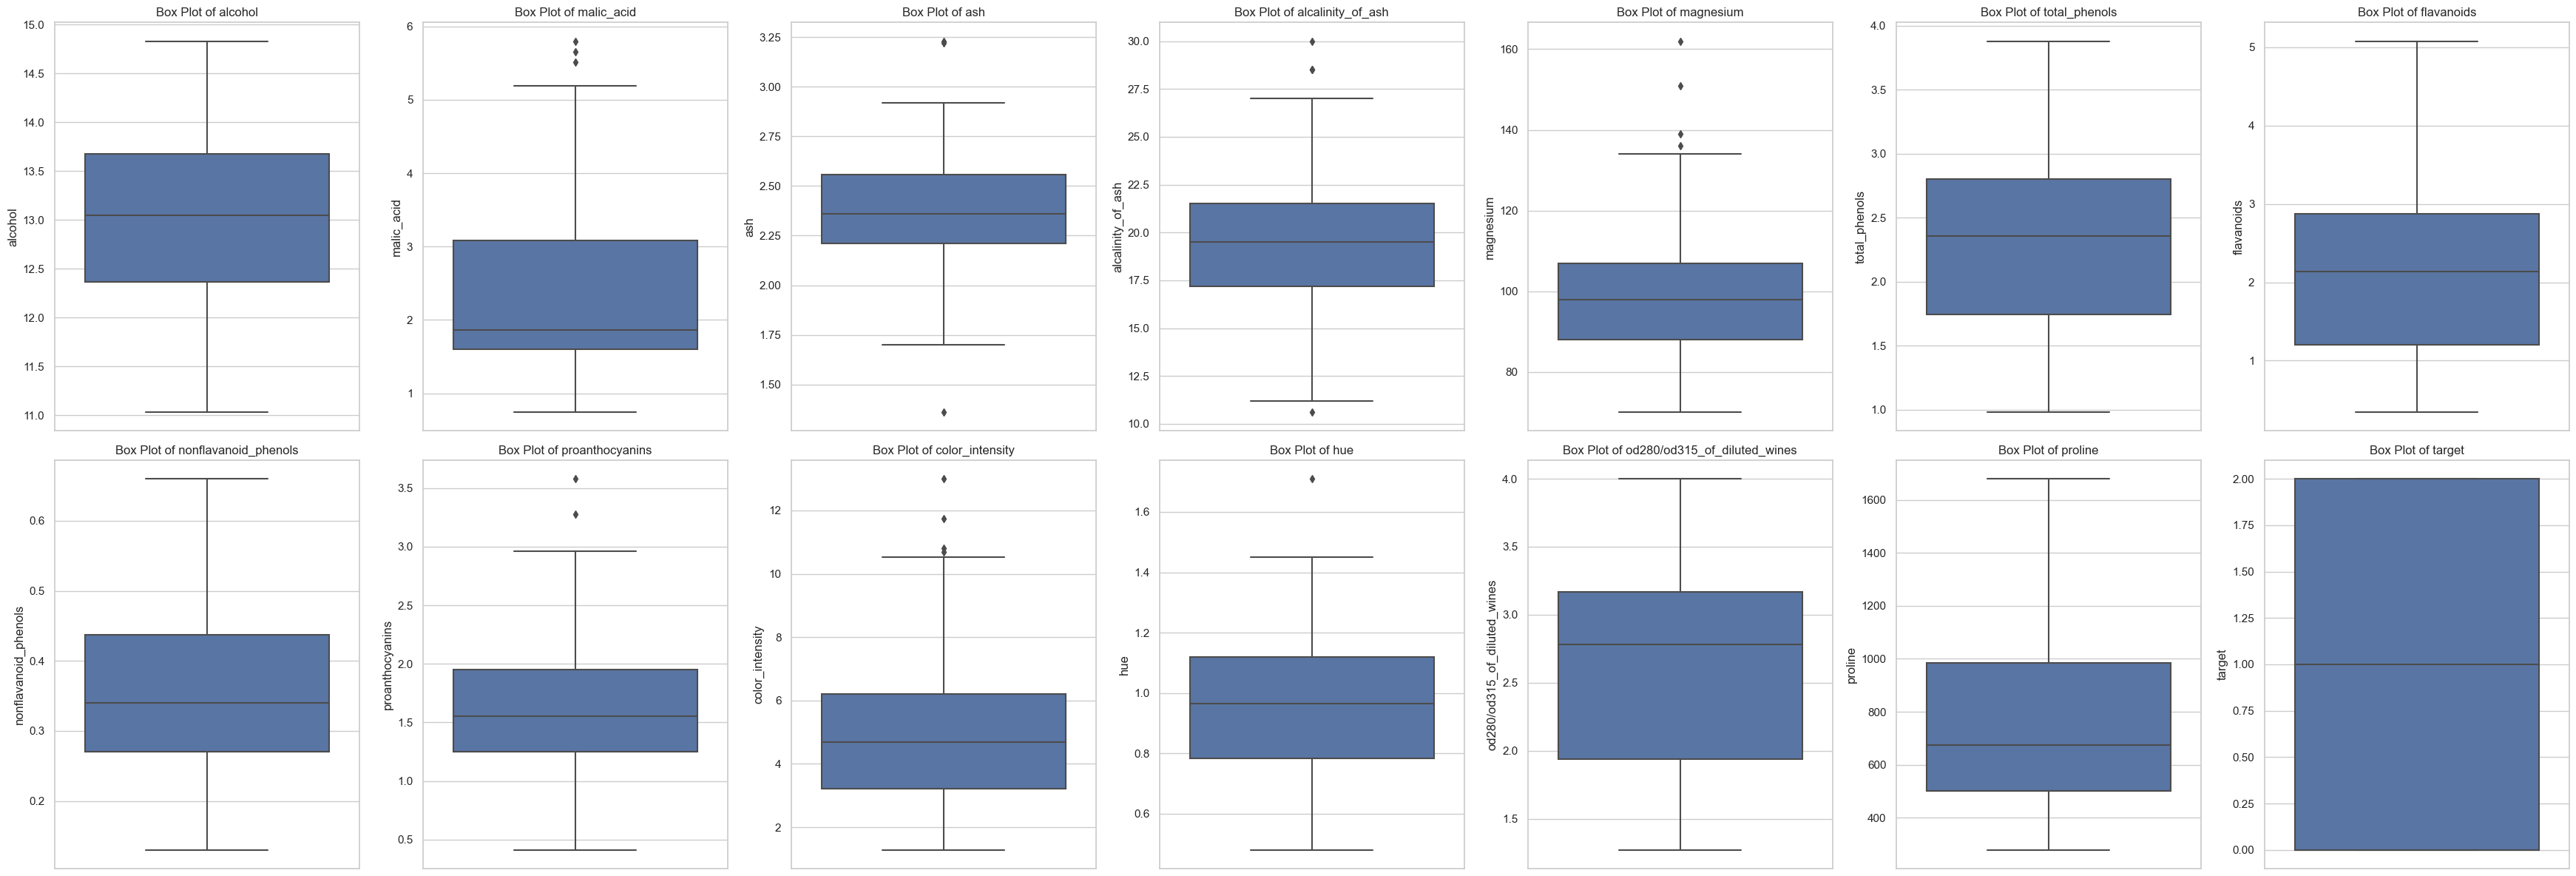

In [10]:
#box distribution
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_cols)
num_cols_per_row = (num_plots + 1) // 2

plt.figure(figsize=(num_cols_per_row * 5, 12))

for i, column in enumerate(num_cols):
    plt.subplot(2, num_cols_per_row, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()



<span style="font-size:20px; font-weight:bold;"> Step 2: Prepare the Data </span>


In [11]:
#data preparation split data into features and target
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
# find the optimal parameters for your model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'n_estimators': 100}


In [13]:
#create and train model

model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

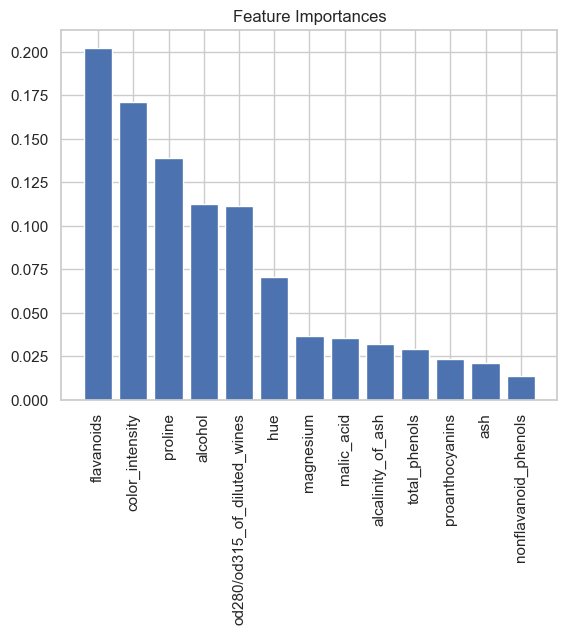

In [14]:
#feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), df.columns[indices], rotation=90)
plt.show()


<span style="font-size:20px; font-weight:bold;"> Step 3: Evaluate the Model</span>


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f"Accuracy:{accuracy}")
print(f"Confusion Matrix: ")
print(confusion)

Accuracy:1.0
Confusion Matrix: 
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.97222222 0.94444444 0.97222222 0.97142857 1.        ]
